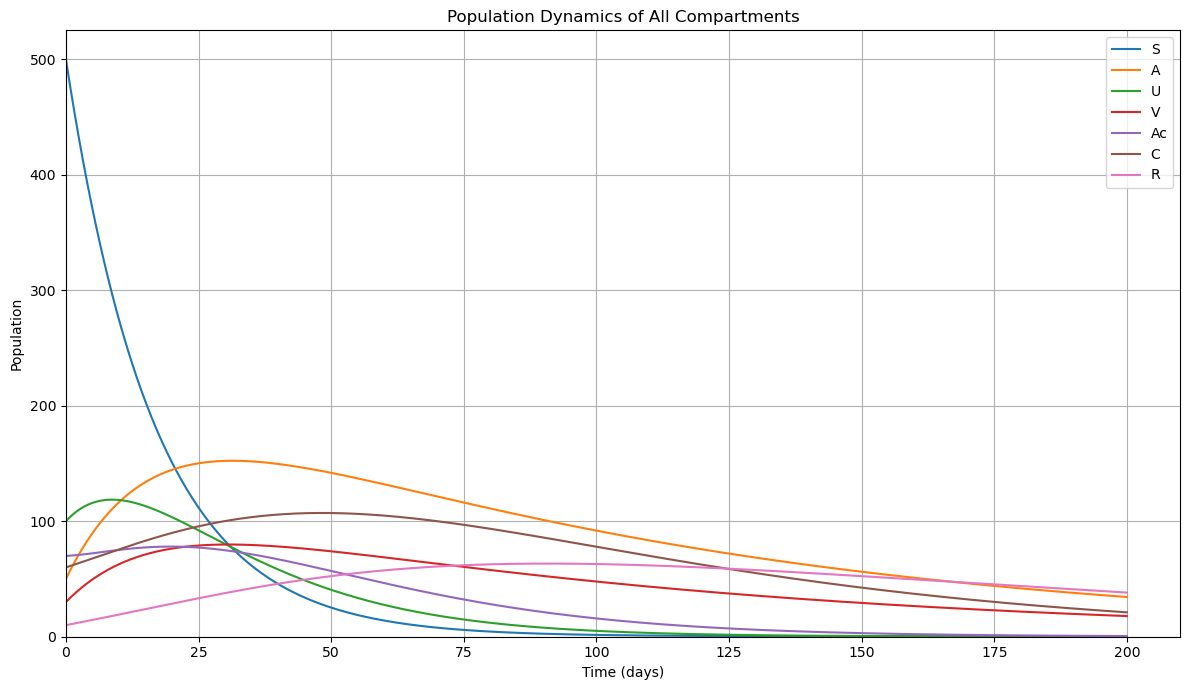

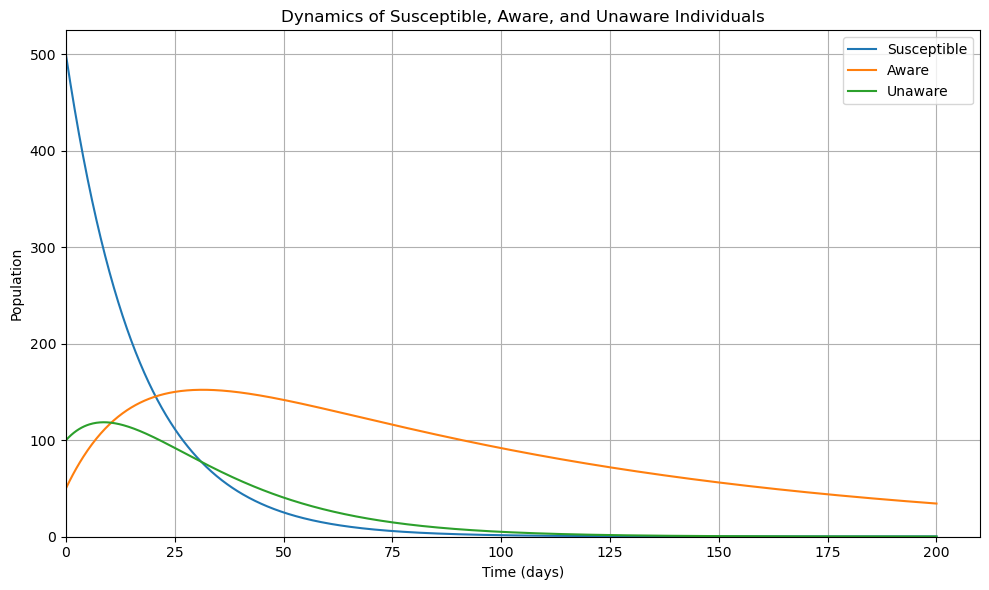

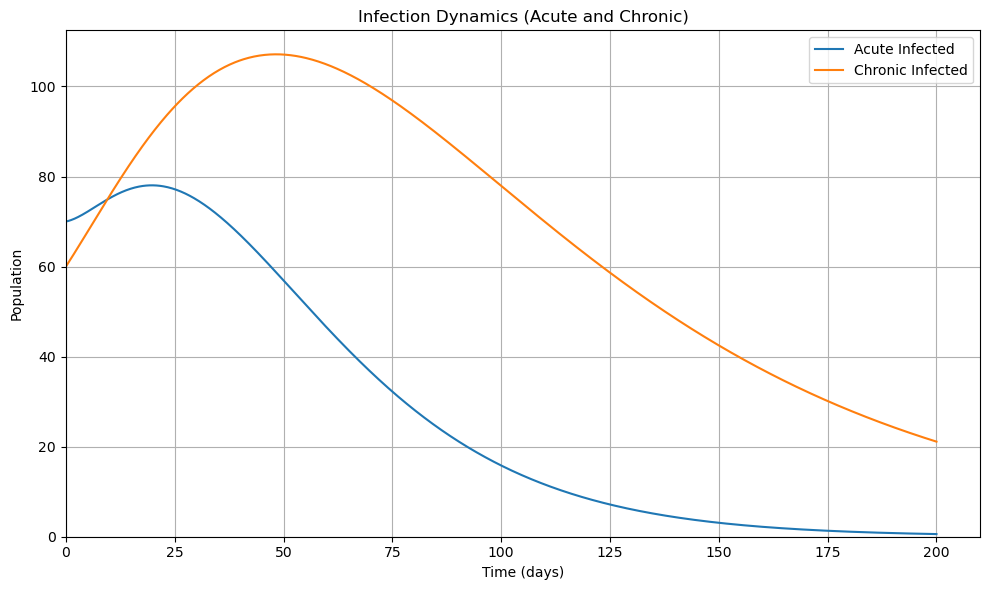

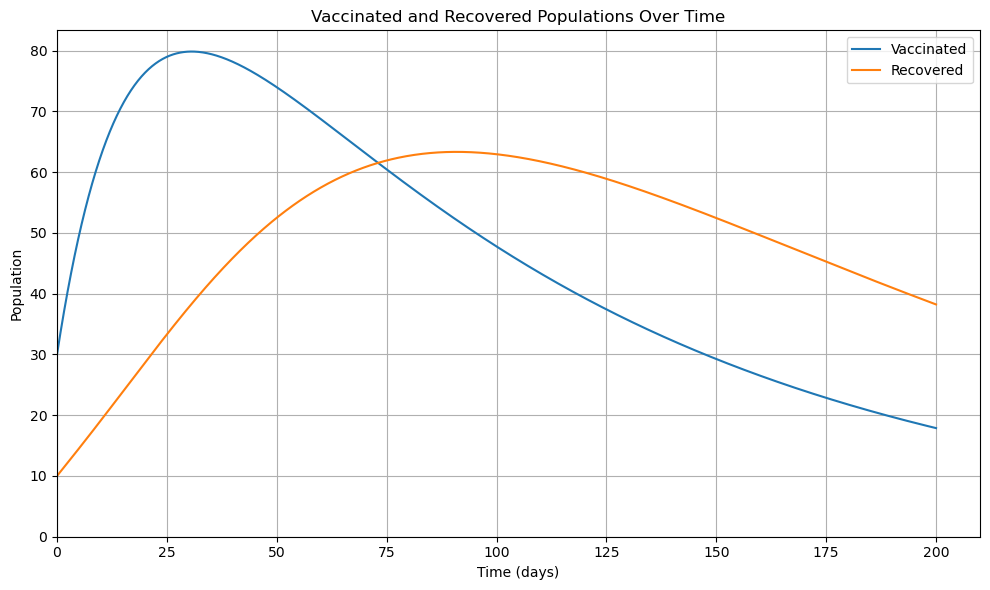

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Parameters (you can tweak these to simulate various scenarios) ---
theta = 0.02     # Recruitment rate (birth)
mu = 0.01        # Natural death rate
alpha1 = 0.02    # Rate of becoming aware
alpha2 = 0.02    # Rate of becoming unaware
beta_S1 = 0.03   # Infection from unaware
beta_S2 = 0.02   # Acute to chronic
beta_S3 = 0.01   # Chronic transmission
omega = 0.01    # Vaccination rate
gamma1 = 0.01   # Recovery from acute
gamma2 = 0.005  # Recovery from chronic

# --- Initial conditions ---
S0 = 500
A0 = 50
U0 = 100
V0 = 30
Ac0 = 70
C0 = 60
R0 = 10
y0 = [S0, A0, U0, V0, Ac0, C0, R0]

# --- Time vector ---
t = np.linspace(0, 200, 1000)

# --- Differential Equations System ---
def HBV_ODE(y, t, theta, mu, alpha1, alpha2, beta_S1, beta_S2, beta_S3, omega, gamma1, gamma2):
    S, A, U, V, Ac, C, R = y
    dSdt = theta - (alpha1 + alpha2 + omega + mu) * S
    dAdt = alpha1 * S - mu * A
    dUdt = alpha2 * S - (beta_S1 + beta_S3 + mu) * U
    dVdt = omega * S - mu * V
    dAcdt = beta_S1 * U - (gamma1 + beta_S2 + mu) * Ac
    dCdt = beta_S2 * Ac + beta_S3 * U - (gamma2 + mu) * C
    dRdt = gamma1 * Ac + gamma2 * C - mu * R
    return [dSdt, dAdt, dUdt, dVdt, dAcdt, dCdt, dRdt]

# --- Solve ODEs ---
result = odeint(HBV_ODE, y0, t, args=(theta, mu, alpha1, alpha2, beta_S1, beta_S2, beta_S3, omega, gamma1, gamma2))
S, A, U, V, Ac, C, R = result.T

# --- Plot 4: All compartments together ---
plt.figure(figsize=(12, 7))
plt.plot(t, S, label='S')
plt.plot(t, A, label='A')
plt.plot(t, U, label='U')
plt.plot(t, V, label='V')
plt.plot(t, Ac, label='Ac')
plt.plot(t, C, label='C')
plt.plot(t, R, label='R')
plt.title('Population Dynamics of All Compartments')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.tight_layout()

# --- Plot 1: Susceptible, Aware, Unaware ---
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, A, label='Aware')
plt.plot(t, U, label='Unaware')
plt.title('Dynamics of Susceptible, Aware, and Unaware Individuals')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.tight_layout()

# --- Plot 2: Acute and Chronic Infections ---
plt.figure(figsize=(10, 6))
plt.plot(t, Ac, label='Acute Infected')
plt.plot(t, C, label='Chronic Infected')
plt.title('Infection Dynamics (Acute and Chronic)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.tight_layout()

# --- Plot 3: Vaccinated and Recovered ---
plt.figure(figsize=(10, 6))
plt.plot(t, V, label='Vaccinated')
plt.plot(t, R, label='Recovered')
plt.title('Vaccinated and Recovered Populations Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.tight_layout()


plt.show()
